In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**CARGAMOS LAS LIBRERIAS QUE VAMOS A NECESITAR**

-[olist_order_items_dataset](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_order_items_dataset.csv)
-[olist_products_dataset](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_products_dataset.csv)
-[product_category_name_translation](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=product_category_name_translation.csv)


In [ ]:
translations = pd.read_csv("/content/product_category_name_translation.csv")

products = pd.read_csv("/content/olist_products_dataset.csv")

orders = pd.read_csv("/content/olist_order_items_dataset.csv")

### Visualizamos nuestros datos

In [ ]:
orders.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
translations.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
#Vamos a actualizar los nombres de las categorias que están en products al ingles

products = products.merge(translations, on='product_category_name', how="left")

products["product_category_name_english"]

0                        perfumery
1                              art
2                   sports_leisure
3                             baby
4                       housewares
                   ...            
32946              furniture_decor
32947    construction_tools_lights
32948               bed_bath_table
32949        computers_accessories
32950               bed_bath_table
Name: product_category_name_english, Length: 32951, dtype: object

In [ ]:
orders = orders.merge(products[['product_id','product_category_name_english']], on='product_id', how='left')

orders.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools


In [ ]:
#Hay productos sin una categoria definida, los cuales no son utiles para nuestro analisis

print(len(orders["product_id"].unique()))

orders.dropna(inplace=True, subset=['product_category_name_english'])

#¿Cuantas "ordenes" unicas hay?
print(len(orders['product_id'].unique()))

#¿Cuantas categorias unicas hay?
print(len(orders["product_category_name_english"].unique()))

32951
32328
71


### Necesitamos tener un historico de las transacciones realizadas, pero estas deben estar asociadas a el producto como tal

- Explicar la solucion que le habiamos dado en primer momento 

**Nosotros podemos reconstruir las transacciones a partir del id del producto**


In [ ]:
example1 = orders[orders['order_id'] == '00018f77f2f0320c557190d7a144bdd3']['product_category_name_english']

print(example1)


1    pet_shop
Name: product_category_name_english, dtype: object


**Podemos entonces, asignar para cada orden una transaccion**

- Enseñar la primera solucion que le habiamos dado

In [ ]:
transactions = orders.groupby("order_id").product_category_name_english.unique()
#Aqui asumimos que solo vaya a haber una compra de la categoria

transactions.head()

order_id
00010242fe8c5a6d1ba2dd792cb16214         [cool_stuff]
00018f77f2f0320c557190d7a144bdd3           [pet_shop]
000229ec398224ef6ca0657da4fc703e    [furniture_decor]
00024acbcdf0a6daa1e931b038114c75          [perfumery]
00042b26cf59d7ce69dfabb4e55b4fd9       [garden_tools]
Name: product_category_name_english, dtype: object

Podemos hacernos hasta aqui varias preguntas de negocio:

- Cuanto dinero recaudaron historicamente las 70 categorias?
- Cual es la categoria de producto más comprada?
- Cual es la relacion que tienen las ciudades con la determinada categoria?
- En que ciudad es más comprada el top 10 categorias?
- Cual es el valor promedio de esas 10 categorias?

Con esta lista de transacciones podemos responder una de las preguntas

***Cual es el top 10 categorias***

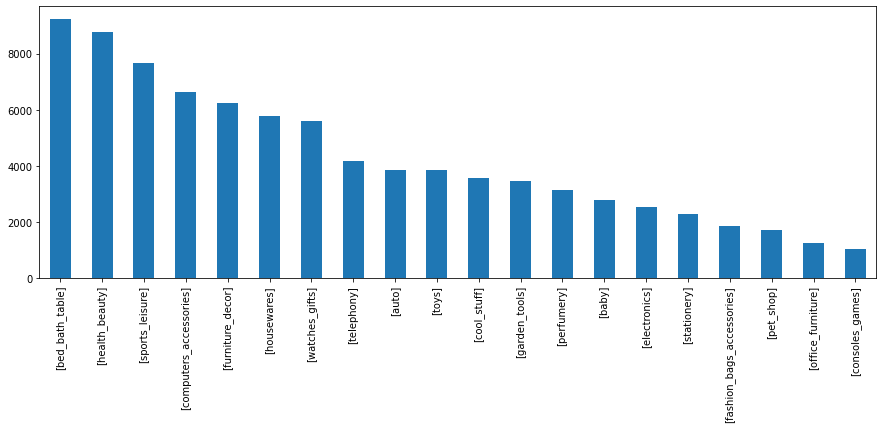

In [ ]:
transactions.value_counts()[:20].plot(kind='bar', figsize=(15,5))

Construido ya la lista de registros unicos (en los cuales se asumio que...) pasaremos, para su manejo algoritmico a una lista

In [ ]:
transactions = transactions.tolist()

AttributeError: ignored

In [ ]:
counts = [len(transaction) for transaction in transactions]

print(np.median(counts))

#Encontramos que la media de transacciones es 1

print(np.max(counts))

#Y que el maximo numero de items en una transaccion es 3

1.0
3


Haremos uso de la libreria mlxtend

(explicar el a que da solucion)

https://rasbt.github.io/mlxtend/

In [ ]:
#Vamos a hacer uso de un codificador que toma como input una lista de transacciones y nos da como output 

from mlxtend.preprocessing import TransactionEncoder


encoder = TransactionEncoder()


encoder.fit(transactions)

# Transform lists into one-hot encoded array.
onehot = encoder.transform(transactions)

# Convert array to pandas DataFrame.
onehot = pd.DataFrame(onehot, columns = encoder.columns_)

# Print header.
onehot.head()

,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
onehot.columns

Index(['agro_industry_and_commerce', 'air_conditioning', 'art',
       'arts_and_craftmanship', 'audio', 'auto', 'baby', 'bed_bath_table',
       'books_general_interest', 'books_imported', 'books_technical',
       'cds_dvds_musicals', 'christmas_supplies', 'cine_photo', 'computers',
       'computers_accessories', 'consoles_games',
       'construction_tools_construction', 'construction_tools_lights',
       'construction_tools_safety', 'cool_stuff', 'costruction_tools_garden',
       'costruction_tools_tools', 'diapers_and_hygiene', 'drinks',
       'dvds_blu_ray', 'electronics', 'fashio_female_clothing',
       'fashion_bags_accessories', 'fashion_childrens_clothes',
       'fashion_male_clothing', 'fashion_shoes', 'fashion_sport',
       'fashion_underwear_beach', 'fixed_telephony', 'flowers', 'food',
       'food_drink', 'furniture_bedroom', 'furniture_decor',
       'furniture_living_room', 'furniture_mattress_and_upholstery',
       'garden_tools', 'health_beauty', 'home_applia

Lo de arriba hace que cada transaccion en vez de ser un regitro unico, venga en forma de tabla; la cual contiene todas las categorias, y el encoder le pone true o false dependiendo de si en la orden el producto fue o no adquirido

A demas, acomoda la lista en orden alfabetico 

The Apriori Algorithm and Pruning

In [ ]:
from mlxtend.frequent_patterns import apriori

#usando el modulo a priori vamos a sacar los produtos con al menos 0,001% de apoyo (podemos variar el valor, pero en este caso, es el valor 
#aceptable paraq que no tengamos ni muy pocos ni muchos; (buscar hipotesis))


#Hacerlo para compras >1 producto, ya que reduce la cantidad de compras para un producto; eso subirira el support




frequent_itemsets = apriori(onehot, min_support = 0.00001, use_colnames=True)

# Print frequent itemsets.
frequent_itemsets

,support,itemsets
0,0.001871,(agro_industry_and_commerce)
1,0.002601,(air_conditioning)
2,0.002077,(art)
3,0.000236,(arts_and_craftmanship)
4,0.003599,(audio)
...,...,...
323,0.000010,"(health_beauty, sports_leisure, computers_acce..."
324,0.000010,"(garden_tools, home_construction, furniture_de..."
325,0.000010,"(home_construction, furniture_decor, housewares)"
326,0.000010,"(watches_gifts, furniture_decor, housewares)"


In [ ]:
# La documentacion para "max len" indica:
#Maximum length of the itemsets generated. If None (default) all possible itemsets lengths (under the apriori condition) are evaluated.

#Nosotros queremos una relacion 1-1, por lo cual lo dejaremos para dos

frequent_itemsets = apriori(onehot, min_support = 0.00001, max_len = 2, use_colnames = True)

Computing association rules from Apriori output

An association rule is an implication expression of the form X→Y, where X and Y are disjoint itemsets 

In [ ]:
from mlxtend.frequent_patterns import association_rules


rules = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.0001)

# Print rules header.
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(baby),(bed_bath_table),0.029664,0.096827,0.000175,0.005893,0.060856,-0.002697,0.908527
1,(bed_bath_table),(baby),0.096827,0.029664,0.000175,0.001805,0.060856,-0.002697,0.972091
2,(baby),(cool_stuff),0.029664,0.037345,0.000206,0.006932,0.185633,-0.000902,0.969375
3,(cool_stuff),(baby),0.037345,0.029664,0.000206,0.005507,0.185633,-0.000902,0.975709
4,(baby),(furniture_decor),0.029664,0.066310,0.000123,0.004159,0.062728,-0.001844,0.937590


Pruning association rules

In [ ]:
# Recover association rules using confidence threshold of 0.01.
rules = association_rules(frequent_itemsets, metric = 'confidence', min_threshold = 0.01)

#estamos buscando metricas mayores al 0.01

# Print rules.
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(art),(furniture_decor),0.002077,0.066310,0.000051,0.024752,0.373287,-0.000086,0.957388
1,(audio),(watches_gifts),0.003599,0.057827,0.000062,0.017143,0.296452,-0.000146,0.958606
2,(furniture_decor),(bed_bath_table),0.066310,0.096827,0.000720,0.010854,0.112101,-0.005701,0.913084
3,(home_confort),(bed_bath_table),0.004082,0.096827,0.000442,0.108312,1.118618,0.000047,1.012881
4,(books_imported),(books),0.000545,0.003218,0.000545,1.000000,310.722045,0.000543,inf
5,(books),(books_imported),0.003218,0.000545,0.000545,0.169329,310.722045,0.000543,1.203190
6,(books_technical),(books),0.002673,0.003218,0.002673,1.000000,310.722045,0.002665,inf
7,(books),(books_technical),0.003218,0.002673,0.002673,0.830671,310.722045,0.002665,5.889872
8,(construction_tools_lights),(furniture_decor),0.002509,0.066310,0.000113,0.045082,0.679872,-0.000053,0.977770
9,(furniture_living_room),(furniture_decor),0.004339,0.066310,0.000072,0.016588,0.250155,-0.000216,0.949439


In [ ]:
# Select rules with a consequent support above 0.095.
rules = rules[rules['consequent support'] > 0.095]

# Print rules.
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(furniture_decor),(bed_bath_table),0.066310,0.096827,0.000720,0.010854,0.112101,-0.005701,0.913084
3,(home_confort),(bed_bath_table),0.004082,0.096827,0.000442,0.108312,1.118618,0.000047,1.012881


Visualizing patterns in metrics

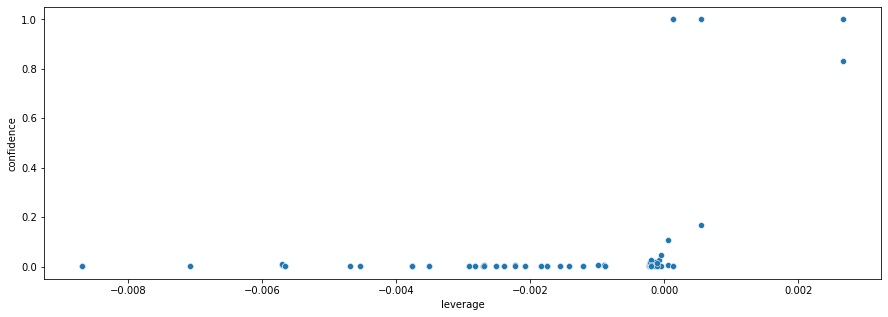

In [ ]:
# Recover association rules with a minimum support greater than 0.000001.
rules = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.000001)

# Plot leverage against confidence.
plt.figure(figsize=(15,5))
sns.scatterplot(x="leverage", y="confidence", data=rules)